## Data science job skills 
 We combine following essential data science skills in int scripting_language,statistics, algorithm, machine_learning, data_visualization, soft_skills, business_management

In [ ]:
import pandas 

In [5]:
# import data
dsIndeed = pandas.read_csv('datascientist_in_ontario_from_indeed.csv')
daaIndeed = pandas.read_csv('dataanalytic_in_ontario_from_indeed.csv')
daIndeed = pandas.read_csv('dataanalyst_in_ontario_from_indeed.csv')
deIndeed = pandas.read_csv('dataengineer_in_ontario_from_indeed.csv')
dmIndeed = pandas.read_csv('datamanager_in_ontario_from_indeed.csv')
baIndeed = pandas.read_csv('businessanalyst_in_ontario_from_indeed.csv')
mlIndeed = pandas.read_csv('machinelearning_in_ontario_from_indeed.csv')
aiIndeed = pandas.read_csv('artificialintelligence_in_ontario_from_indeed.csv')
aisysIndeed = pandas.read_csv('aisystem_in_ontario_from_indeed.csv')

dsGlassdoor = pandas.read_csv('datascientist_in_ontario_from_glassdoor.csv')

daGlassdoor = pandas.read_csv('dataanalytic_in_ontario_from_glassdoor.csv')

deGlassdoor = pandas.read_csv('dataengineer_in_ontario_from_glassdoor.csv')

dmGlassdoor = pandas.read_csv('datamanager_in_ontario_from_glassdoor.csv')

baGlassdoor = pandas.read_csv('businessanalyst_in_ontario_from_glassdoor.csv')

mlGlassdoor = pandas.read_csv('machinelearning_in_ontario_from_glassdoor.csv')
aiGlassdoor = pandas.read_csv('artificialintelligence_in_ontario_from_glassdoor.csv')

In [7]:
# Put the same job into one dataframe
datascientist=[dsGlassdoor,dsIndeed]
datascientist=pandas.concat(datascientist)

dataanalytic=[daGlassdoor,daIndeed]
dataanalytic=pandas.concat(dataanalytic)

dataengineer=[deGlassdoor,deIndeed]
dataengineer=pandas.concat(dataengineer)

datamanager=[dmGlassdoor,dmIndeed]
datamanager=pandas.concat(datamanager)

AI=[aiGlassdoor,mlGlassdoor,aisysIndeed,aiIndeed,mlIndeed]
AI=pandas.concat(AI)

businessanalyst=[baGlassdoor,baIndeed]
businessanalyst=pandas.concat(businessanalyst)


In [9]:
# bag of words for different skills
scripting_language = ['excel','python','r','sql','java','ruby','c','perl','javascript','js','scala','spark','matlab','sas','octave','pig','sum','spss']

statistics = ['statistics','stats','math','mathematics','probability','optimization','algebra','quantitative','analytical','calculus','sum','distribution','transformation','variable','continuous','independent','simulation']
algorithm = ['structures','structure','order','strategy','strategies','analyze','analysis']

machine_learning = ['machine','learning','ai','artificial','intelligence','supervised','unsupervised','modelling','sum','neural','classification','tuning','clustering','regression','deep','validation','training','feature','batch','scikit']

data_visualization =['visualization','visualisation','visualize','d3','watson','sum','graph','graphic','visualizing','matplotlib','charts']

soft_skills= ['creativity','curiosity','leading','lead','intuition','communication','communicate','teamwork','presentation','persuasive','team','perspective','inquisitive','logic','sum']

business_management = ['business','manage','management','leading','lead','mba','finance','financial']
                    

In [10]:
# This function counts how many times a list of words appear in a tweet,
# and create a new dataframe column to store it

def countkey(df, keywords ,name):

    """this function counts words in a dataframe column 
        
        This function counts how many times a list of words appear in a tweet
        ,and create a new dataframe column to store it
        Args:
            df: the dataframe that need to be clean    
            keywords: a list of bag of words that we are uisng to count
            name: the new column name in the dataframe
        """ 
    newtweet = "" 
    #use to store each tweet
    newtweets = [] 
    #put new tweet into list of tweets
    
    for oldtweet in df['clean']: 
        check = oldtweet.split()
        for word in check:
            checkpoint = False
            for s in keywords:
                if word == s:
                    checkpoint = True
                    break
                else:
                    continue
            if checkpoint == True:
                newtweet = newtweet + word + " "
        newtweet = len(newtweet.split())
        newtweets.append(newtweet)
        newtweet = ""
    df[name] = newtweets
    return df

In [11]:
def cleaning (df, file) :
    
    """this function is to clean dataframe 
        
        This function is to clean dataframe file like: URLs, htmls,character, and numbers, as well as some stopwords
        
        Args:
            df: the dataframe that need to be clean    
            file: stopwords
        """ 

    # 1.URLs needs to get cleaned first since '[a-z]*[:.]+\S+' is a pattern matching which requires "/" in urls
    df['clean'] = df['Long Summary'].str.replace('[a-z]*[:.]+\S+', '')
    # 2.remove html tages 
    df['clean'] = df['clean'].str.replace('<.*?>', '')
    # 3.[^A-Za-z ]+ removes non character, non numbers wit
    df['clean'] = df['clean'].str.replace('[^A-Za-z ]+', '')
    # 4.replace capital letters with lowercase case letters 
    df['clean']= df['clean'].str.lower()
    # Compare the words from tweets with stopwords and 
    df['clean'] = df['clean'].astype(str)
    return None

In [12]:
#apply clean data function
cleaning (datascientist,'stop_words.txt')
cleaning (dataanalytic,'stop_words.txt')
cleaning (dataengineer,'stop_words.txt')
cleaning (datamanager,'stop_words.txt')
cleaning (AI,'stop_words.txt')
cleaning (businessanalyst,'stop_words.txt')


In [13]:
# using countkey function to count skills 
countkey(businessanalyst, scripting_language ,'scripting_language')
countkey(businessanalyst, data_visualization,'data_visualization')
countkey(businessanalyst, machine_learning ,'machine_learning')
countkey(businessanalyst, soft_skills ,'soft_skills')
countkey(businessanalyst, business_management ,'business_management')
countkey(businessanalyst, algorithm ,'algorithm')
countkey(businessanalyst, statistics ,'statistics')


,Id,Job Title,Link,Long Summary,Short Summary,company,clean,scripting_language,data_visualization,machine_learning,soft_skills,business_management,algorithm,statistics
0,2690438385,Management Consultant / Seasoned Executive,https://www.glassdoor.com/partner/jobListing.h...,"International Services, Inc. is looking for hi...",NaN,"International Services, Inc",international services inc is looking for high...,0,0,0,0,7,0,0
1,2683639038,Senior Financial Analyst,https://www.glassdoor.com/partner/jobListing.h...,"As a member of the Finance team, you will be ...",NaN,Hot Topic,as a member of the finance team you will be i...,0,0,0,2,16,4,1
2,2576484297,Contingent - Project Analyst,https://www.glassdoor.com/partner/jobListing.h...,Perform a variety of tasks supporting NSWC Cor...,NaN,NaN,perform a variety of tasks supporting nswc cor...,0,0,2,0,12,1,1
3,2693059574,Clerk 10 – Analyst 3 45099 (NB8) (SS4) - BHJOB...,https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionJob ID: 45099Clerk 10 – Analyst...,NaN,Fast Switch,job descriptionjob id clerk analyst the ene...,1,0,1,0,3,1,1
4,2564056185,Automated Systems Analyst,https://www.glassdoor.com/partner/jobListing.h...,Automated Systems AnalystDivision: Administrat...,NaN,Community Action Partnership,automated systems analystdivision administrati...,2,1,2,5,12,8,1
5,2695075776,Business Analyst - WMS Implementations,https://www.glassdoor.com/partner/jobListing.h...,"DSV - Global transport and logistics In 1976, ...",NaN,DSV,dsv global transport and logistics in ten in...,1,0,1,0,9,2,4
6,2660460300,Residential Property Consultant (Purchase and ...,https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionA Residential Property Consulta...,NaN,Berkshire Hathaway HomeServices California Pr...,job descriptiona residential property consulta...,0,0,1,1,0,0,0
7,2681758039,Lead Systems Analyst- Epic Reporting TL,https://www.glassdoor.com/partner/jobListing.h...,Job Description: Lead Systems Analyst - Epic ...,NaN,City of Hope,job description lead systems analyst epic re...,0,0,5,17,6,0,0
8,2638609339,Retail Sales Consultant,https://www.glassdoor.com/partner/jobListing.h...,Job Summary Here's your opportunity to join ...,NaN,Sprint,job summary heres your opportunity to join a...,0,0,2,5,2,0,0
9,2666009799,Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionHours: Monday-Friday 5:45AM-2:...,NaN,Sincerus Solutions,job descriptionhours mondayfriday computer s...,0,0,0,1,0,0,0


In [14]:
countkey(datascientist, scripting_language ,'scripting_language')
countkey(datascientist, data_visualization,'data_visualization')
countkey(datascientist, machine_learning ,'machine_learning')
countkey(datascientist, soft_skills ,'soft_skills')
countkey(datascientist, business_management ,'business_management')
countkey(datascientist, algorithm ,'algorithm')
countkey(datascientist, statistics ,'statistics')


,Id,Job Title,Link,Long Summary,Short Summary,company,clean,scripting_language,data_visualization,machine_learning,soft_skills,business_management,algorithm,statistics
0,2636702707,Data Architect,https://www.glassdoor.com/partner/jobListing.h...,Job Summary: This position will support LLUSS'...,NaN,Loma Linda University,job summary this position will support llusss ...,3,1,0,3,5,0,1
1,2524222410,SAP BI (Business Intelligence) Analyst,https://www.glassdoor.com/partner/jobListing.h...,Position: SAP BI AnalystWho Are We?Orora Packa...,NaN,Orora,position sap bi analystwho are weorora packagi...,0,0,5,2,19,3,2
2,2674880436,Sr. Research Scientist,https://www.glassdoor.com/partner/jobListing.h...,This Senior Research Scientist is expected to...,NaN,Leica Biosystems,this senior research scientist is expected to...,1,0,0,5,7,0,0
3,2655811045,Clinical Lab Scientist (Microbiology),https://www.glassdoor.com/partner/jobListing.h...,REQ ID: req4850 Location: AHMC Anaheim Regio...,NaN,AHMC Healthcare,req id req location ahmc anaheim regional me...,0,0,0,0,0,0,2
4,2689260622,Manufacturing Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,"At Niagara, we’re looking for Team Members who...",NaN,Niagara Bottling,at niagara were looking for team members who w...,2,0,0,11,10,3,3
5,2673198693,Senior Data Engineer,https://www.glassdoor.com/partner/jobListing.h...,Genuent is looking to fill a Senior Data Engin...,NaN,Genuent,genuent is looking to fill a senior data engin...,8,0,4,2,11,1,0
6,2689457664,"Manager, Data Scientist",https://www.glassdoor.com/partner/jobListing.h...,"Business Title: Manager, Data Scientist Requis...",NaN,KPMG US,business title manager data scientist requisit...,11,0,6,1,5,6,5
7,2676610947,"College Intern, Information Technology - Data ...",https://www.glassdoor.com/partner/jobListing.h...,Requirements:Pursuing or earned Advanced degre...,NaN,Beckman Coulter,r or earned advanced degree in data science st...,7,0,4,2,2,2,3
8,2560735758,Data Consultant-Marketing,https://www.glassdoor.com/partner/jobListing.h...,The Data Analytic Consultant provides support...,NaN,KAISER,the data analytic consultant provides support...,0,0,0,2,3,1,0
9,1827597765,Lead Business Intelligence Analyst,https://www.glassdoor.com/partner/jobListing.h...,"DUTIES: Responsible for design, development an...",NaN,Aviana Global Technologies,duties responsible for design development and ...,1,0,2,5,3,1,2


In [15]:
countkey(dataanalytic, scripting_language ,'scripting_language')
countkey(dataanalytic, data_visualization,'data_visualization')
countkey(dataanalytic, machine_learning ,'machine_learning')
countkey(dataanalytic, soft_skills ,'soft_skills')
countkey(dataanalytic, business_management ,'business_management')
countkey(dataanalytic, algorithm ,'algorithm')
countkey(dataanalytic, statistics ,'statistics')


,Id,Job Title,Link,Long Summary,Short Summary,company,clean,scripting_language,data_visualization,machine_learning,soft_skills,business_management,algorithm,statistics
0,2664763073,Quality Engineer,https://www.glassdoor.com/partner/jobListing.h...,Quality EngineerRole Quality Engineers (QE) ar...,NaN,Solvay,quality engineerrole quality engineers qe are ...,0,0,0,6,0,1,3
1,2658849402,HRIS Consultant,https://www.glassdoor.com/partner/jobListing.h...,"HRIS ConsultantLocation: Whittier, CAThe HRIS ...",NaN,NaN,hris consultantlocation whittier cathe hris co...,1,0,0,1,0,0,0
2,2587014752,Sales Account Executive - United States,https://www.glassdoor.com/partner/jobListing.h...,Are you ready to sell the world’s best-known ...,NaN,Procter & Gamble,are you ready to sell the worlds bestknown br...,0,0,0,5,14,1,2
3,2674690925,Sales Operations Analyst,https://www.glassdoor.com/partner/jobListing.h...,Makita is a worldwide leader in the profession...,NaN,"Makita U.S.A., Inc.",makita is a worldwide leader in the profession...,1,0,1,4,6,0,1
4,2629045063,"Director, Evaluation and Assessment",https://www.glassdoor.com/partner/jobListing.h...,"Director, Evaluation and Assessment Job Numb...",NaN,UC Riverside,director evaluation and assessment job numbe...,3,0,1,4,3,3,4
5,2572802441,Project Manager / Business Analyst,https://www.glassdoor.com/partner/jobListing.h...,Project Manager / Business Analyst In the lo...,NaN,Dntg,project manager business analyst in the loo...,1,0,0,2,15,3,0
6,2670206563,Command Center Operations (Intern-Undergrad),https://www.glassdoor.com/partner/jobListing.h...,Lay the groundwork for a dynamic future with ...,NaN,Kaiser Permanente,lay the groundwork for a dynamic future with ...,1,0,1,2,7,2,1
7,2678067873,Portfolio Simplification and Rationalization A...,https://www.glassdoor.com/partner/jobListing.h...,The analyst for simplification/rationalizatio...,NaN,Ventura Foods,the analyst for simplificationrationalization...,1,0,0,3,9,1,4
8,2594592077,Quality Assurance Analyst,https://www.glassdoor.com/partner/jobListing.h...,East West Bank is one of the largest independ...,NaN,East West Bank,east west bank is one of the largest independ...,1,0,1,3,9,1,2
9,2664470827,Clinical Pharmacist,https://www.glassdoor.com/partner/jobListing.h...,POSITION PURPOSE Under the direction of the Ph...,NaN,Inland Empire Health Plan,position purpose under the direction of the ph...,0,0,1,15,4,0,1


In [16]:
countkey(dataengineer, scripting_language ,'scripting_language')
countkey(dataengineer, data_visualization,'data_visualization')
countkey(dataengineer, machine_learning ,'machine_learning')
countkey(dataengineer, soft_skills ,'soft_skills')
countkey(dataengineer, business_management ,'business_management')
countkey(dataengineer, algorithm ,'algorithm')
countkey(dataengineer, statistics ,'statistics')


,Id,Job Title,Link,Long Summary,Short Summary,company,clean,scripting_language,data_visualization,machine_learning,soft_skills,business_management,algorithm,statistics
0,2664763073,Quality Engineer,https://www.glassdoor.com/partner/jobListing.h...,Quality EngineerRole Quality Engineers (QE) ar...,NaN,Solvay,quality engineerrole quality engineers qe are ...,0,0,0,6,0,1,3
1,2537749109,Director - IMT Engineering,https://www.glassdoor.com/partner/jobListing.h...,APU is seeking employees who desire to engage...,NaN,Azusa Pacific University,apu is seeking employees who desire to engage...,1,0,3,21,34,6,5
2,2608673048,Manufacturing Engineer,https://www.glassdoor.com/partner/jobListing.h...,Hubbell Incorporated is an international manu...,NaN,Hubbell Lighting,hubbell incorporated is an international manu...,0,0,4,2,4,1,2
3,2666177836,ENGINEERING PROJECT LEAD (PLASTIC)***Up to 105...,https://www.glassdoor.com/partner/jobListing.h...,SUMMARY The Engineering Project Lead is respon...,NaN,Lisi Aerospace,summary the engineering project lead is respon...,0,0,1,9,10,9,3
4,2303299181,Software Engineer - Web Team,https://www.glassdoor.com/partner/jobListing.h...,Liferay is an award-winning open source Digit...,NaN,"Liferay, Inc.",liferay is an awardwinning open source digita...,4,0,0,0,0,0,0
5,2608104140,Network Engineer II,https://www.glassdoor.com/partner/jobListing.h...,Job Title: Network Engineer II Full-Time/Part ...,NaN,ConvergeOne,job title network engineer ii fulltimepart tim...,0,0,0,7,2,0,0
6,2694051913,Supplier Quality Engineer II,https://www.glassdoor.com/partner/jobListing.h...,Johnson & Johnsons Cardiovascular & Specialt...,NaN,Johnson & Johnson,johnson johnsons cardiovascular specialty ...,0,0,0,1,6,1,0
7,2570711581,Assistant Project Engineer,https://www.glassdoor.com/partner/jobListing.h...,"At ERRG, we believe that each of our projects...",NaN,ERRG,at errg we believe that each of our projects ...,3,0,1,2,1,0,1
8,2694940185,Electrical Automation & Controls Engineer,https://www.glassdoor.com/partner/jobListing.h...,Job Number 18002147 Company Nestle Waters No...,NaN,Nestle,job number company nestle waters north amer...,1,0,1,13,15,0,2
9,2684930883,Java Software Engineer Casual innovators get 4...,https://www.glassdoor.com/partner/jobListing.h...,Want to keep it casual and stay innovative? Em...,NaN,NaN,want to keep it casual and stay innovative emb...,4,0,0,0,0,0,0


In [17]:
countkey(datamanager, scripting_language ,'scripting_language')
countkey(datamanager, data_visualization,'data_visualization')
countkey(datamanager, machine_learning ,'machine_learning')
countkey(datamanager, soft_skills ,'soft_skills')
countkey(datamanager, business_management ,'business_management')
countkey(datamanager, algorithm ,'algorithm')
countkey(datamanager, statistics ,'statistics')


,Id,Job Title,Link,Long Summary,Short Summary,company,clean,scripting_language,data_visualization,machine_learning,soft_skills,business_management,algorithm,statistics
0,2661964896,Category Manager,https://www.glassdoor.com/partner/jobListing.h...,"DescriptionAt Schwan's Company, we are driven ...",NaN,Schwan's,descriptionat schwans company we are driven to...,1,0,0,1,7,3,0
1,2661212976,Pediatric Manager,https://www.glassdoor.com/partner/jobListing.h...,"""Responsibilities:Implement effective busines...",NaN,Pacific Dental Services,r effective business target market data attr...,1,0,0,1,4,1,0
2,2670629403,"Manager, Medical Office",https://www.glassdoor.com/partner/jobListing.h...,Job Summary:Under the general direction of the...,NaN,St. Joseph Health System,job s the general direction of the director t...,2,0,3,9,17,2,2
3,2651093852,Preconstruction Manager,https://www.glassdoor.com/partner/jobListing.h...,About Us: University Mechanical & Engineering...,NaN,"EMCOR Group, Inc.",about us university mechanical engineering c...,1,0,0,4,5,0,0
4,2694795862,Waddington Warehouse Operations Manager,https://www.glassdoor.com/partner/jobListing.h...,Job Title: Warehouse Operations Manager Locat...,NaN,NaN,job title warehouse operations manager locati...,1,0,0,0,3,0,0
5,2693246198,manager / product development,https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionProvide the highest level of i...,NaN,Card Inc.,job descriptionprovide the highest level of i...,0,0,0,0,2,0,1
6,2569008671,Channel Marketing Manager,https://www.glassdoor.com/partner/jobListing.h...,Position Overview:Reporting to the Director of...,NaN,Danaher,position o to the director of global marketing...,1,0,0,0,2,0,0
7,2589597813,"Manager, IT Systems Administration (IDS Califo...",https://www.glassdoor.com/partner/jobListing.h...,Be a part of cutting edge Technology and Inno...,NaN,Raytheon,be a part of cutting edge technology and inno...,0,0,2,13,9,3,0
8,2667687811,Deputy Manager of Operations,https://www.glassdoor.com/partner/jobListing.h...,The PositionThere is (1) vacancy in the Opera...,NaN,Inland Empire Utilities Agency,the positionthere is vacancy in the operatio...,1,0,5,1,9,4,5
9,2506097928,Consumer Insights Manager,https://www.glassdoor.com/partner/jobListing.h...,Requisition Number 17-0146 Post Date 8/8/2017...,NaN,Yamaha America,requisition number post date title consumer...,1,0,0,3,5,1,2


In [18]:
countkey(AI, scripting_language ,'scripting_language')
countkey(AI, data_visualization,'data_visualization')
countkey(AI, machine_learning ,'machine_learning')
countkey(AI, soft_skills ,'soft_skills')
countkey(AI, business_management ,'business_management')
countkey(AI, algorithm ,'algorithm')
countkey(AI, statistics ,'statistics')


,Id,Job Title,Link,Long Summary,Short Summary,company,clean,scripting_language,data_visualization,machine_learning,soft_skills,business_management,algorithm,statistics
0,2656098831,Sr. Software Engineer - Mobile App (iOS),https://www.glassdoor.com/partner/jobListing.h...,Role The Sr. Software Engineer - Mobile App wi...,NaN,NaN,role the sr software engineer mobile app will...,2,0,0,3,0,1,0
1,2663682305,Software Engineering Intern,https://www.glassdoor.com/partner/jobListing.h...,Internships Orange Software Engineering Inte...,NaN,SendGrid,internships orange software engineering inte...,3,0,5,4,0,2,0
2,2616952386,Software Engineer – Fontana CA,https://www.glassdoor.com/partner/jobListing.h...,Revature has partnered with a Fortune 500 comp...,NaN,Revature,revature has partnered with a fortune company...,0,0,0,2,0,0,0
3,2476755503,Software Engineer C++,https://www.glassdoor.com/partner/jobListing.h...,Softxpert is looking for an exceptional C++ s...,NaN,Softxpert,softxpert is looking for an exceptional c sof...,1,0,0,0,0,0,0
4,2489298282,Senior Software Engineer,https://www.glassdoor.com/partner/jobListing.h...,The Senior Software Engineer will help design...,NaN,CODA Energy,the senior software engineer will help design...,3,1,2,7,2,1,0
5,2573933662,Software Engineer - DevOps,https://www.glassdoor.com/partner/jobListing.h...,Our Information Services team is focused on b...,NaN,"Liferay, Inc.",our information services team is focused on b...,1,0,0,5,0,2,1
6,2689457664,"Manager, Data Scientist",https://www.glassdoor.com/partner/jobListing.h...,"Business Title: Manager, Data ScientistRequisi...",NaN,KPMG US,business title manager data scientistrequisiti...,10,0,6,2,5,4,5
7,2640676729,(INTERNSHIP) GPS SOFTWARE ENGINEER,https://www.glassdoor.com/partner/jobListing.h...,Software Engineer Internship:This position is ...,NaN,L3 Technologies,software engineer i position is available for ...,5,0,1,3,2,0,1
8,2684930883,Java Software Engineer Casual innovators get 4...,https://www.glassdoor.com/partner/jobListing.h...,Want to keep it casual and stay innovative? Em...,NaN,NaN,want to keep it casual and stay innovative emb...,4,0,0,0,0,0,0
9,2689734368,Sr. Data Scientist (Sr. Advisor),https://www.glassdoor.com/partner/jobListing.h...,Are you looking to make a difference in your c...,NaN,Southern California Edison,are you looking to make a difference in your c...,8,2,7,2,14,2,11


In [19]:
# sum all the job skills  
business_management
algorithm
statistics
JobFinal = {'data scientist': [ sum(datascientist['scripting_language']),
              sum(datascientist['data_visualization']),
              sum(datascientist['business_management']),
              sum(datascientist['algorithm']),
              sum(datascientist['machine_learning']),
              sum(datascientist['statistics']),
              sum(datascientist['soft_skills'])] ,
            
            'data analytic': 
            [ sum(dataanalytic['scripting_language']),
              sum(dataanalytic['data_visualization']),
              sum(dataanalytic['business_management']),
              sum(dataanalytic['algorithm']),
              sum(dataanalytic['machine_learning']),
              sum(dataanalytic['statistics']),
              sum(dataanalytic['soft_skills'])] ,
            
            'data engineer':  
            [ sum(dataengineer['scripting_language']),
              sum(dataengineer['data_visualization']),
              sum(dataengineer['business_management']),
              sum(dataengineer['algorithm']),
              sum(dataengineer['machine_learning']),
              sum(dataengineer['statistics']),
              sum(dataengineer['soft_skills'])] ,
            
            'data manager': 
            [ sum(datamanager['scripting_language']),
              sum(datamanager['data_visualization']),
              sum(datamanager['business_management']),
              sum(datamanager['algorithm']),
              sum(datamanager['machine_learning']),
              sum(datamanager['statistics']),
              sum(datamanager['soft_skills'])] ,
            
        
            'AI': 
            [ sum(AI['scripting_language']),
              sum(AI['data_visualization']),
              sum(AI['business_management']),
              sum(AI['algorithm']),
              sum(AI['machine_learning']),
              sum(AI['statistics']),
              sum(AI['soft_skills'])] ,
            
            
            'business analyst':
            [ sum(businessanalyst['scripting_language']),
              sum(businessanalyst['data_visualization']),
              sum(businessanalyst['business_management']),
              sum(businessanalyst['algorithm']),
              sum(businessanalyst['machine_learning']),
              sum(businessanalyst['statistics']),
              sum(businessanalyst['soft_skills'])] ,
            
            
            'Skills':['scripting_language','data_visualization','business_management',
                      'machine_learning','algorithm','statistics','soft_skills']
                     }
                  
                  

In [20]:
JobFinal = pandas.DataFrame(data=JobFinal)

In [21]:
JobFinal

,AI,Skills,business analyst,data analytic,data engineer,data manager,data scientist
0,3125,scripting_language,1555,2107,2376,1637,1235
1,312,data_visualization,141,192,182,139,135
2,7135,business_management,14458,9400,5093,13288,2659
3,2272,machine_learning,3686,3308,1818,3730,1067
4,9991,algorithm,1705,2042,2693,2161,2333
5,2212,statistics,1714,2122,1478,2126,1004
6,7299,soft_skills,5945,4659,5172,7692,2362


In [22]:
# normalizing data by averaging total numbers of each kind of job 
JobFinal['AI']=[x/1710 for x in JobFinal['AI'] ]
JobFinal['business analyst']=[x/1435 for x in JobFinal['business analyst'] ]
JobFinal['data analytic']=[x/1108 for x in JobFinal['data analytic'] ]
JobFinal['data engineer']=[x/1269 for x in JobFinal['data engineer'] ]
JobFinal['data manager']=[x/1451 for x in JobFinal['data manager'] ]
JobFinal['data scientist']=[x/499 for x in JobFinal['data scientist'] ]


In [23]:
JobFinal=JobFinal.set_index(['Skills'])

# Plot Job Spider Skills 

In [24]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
%matplotlib inline

In [79]:
df=JobFinal.T
df

Skills,scripting_language,data_visualization,business_management,machine_learning,algorithm,statistics,soft_skills
AI,1.827485,0.182456,4.172515,1.328655,5.842690,1.293567,4.268421
business analyst,1.083624,0.098258,10.075261,2.568641,1.188153,1.194425,4.142857
data analytic,1.901625,0.173285,8.483755,2.985560,1.842960,1.915162,4.204874
data engineer,1.872340,0.143420,4.013396,1.432624,2.122143,1.164697,4.075650
data manager,1.128187,0.095796,9.157822,2.570641,1.489318,1.465196,5.301172
data scientist,2.474950,0.270541,5.328657,2.138277,4.675351,2.012024,4.733467


In [80]:
df['Job']=['AI','business analyst','data analytic','data engineer','data manager','data scientist']
df.reset_index(level=0, inplace=True)


In [81]:
df=df.drop(['index'], axis=1)

In [83]:
df['scripting_language']=df['scripting_language']*40.4
df['data_visualization']=df['data_visualization']*369
df['machine_learning']=df['machine_learning']*33.49
df['algorithm']=df['algorithm']*17.1
df['statistics']=df['statistics']*49.7
df['business_management']=df['business_management']*9.92
df['soft_skills']=df['soft_skills']*18.86


In [84]:
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [91]:
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=10)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=10)
    plt.ylim(0,100)

    # Ind1
    values=df.loc[row].drop('Job').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=3, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=19, color=color, y=1.1)
    
    plt.tight_layout()


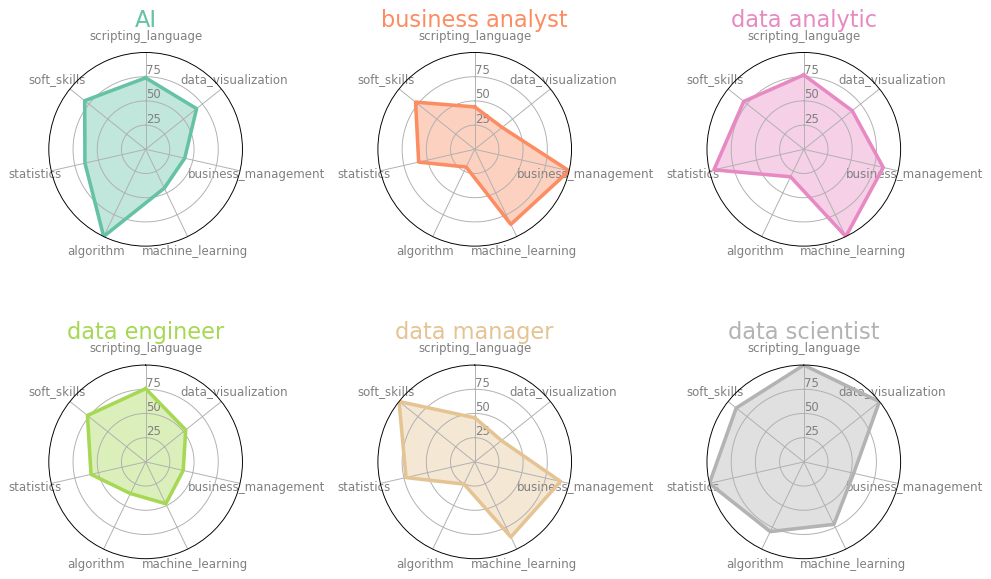

In [92]:
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=85
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row,title=df['Job'][row], color=my_palette(row))
